In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt 
%matplotlib inline

In [125]:
df_train = pd.read_csv('C:\\Users\\surya.teja\\Downloads\\original\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


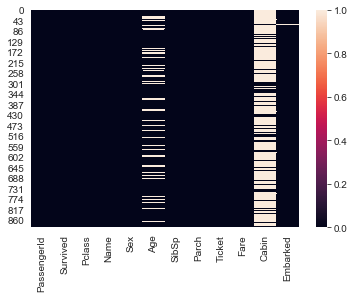

In [19]:
sns.heatmap(df_train.isnull())

In [55]:
sns.set_style('whitegrid')

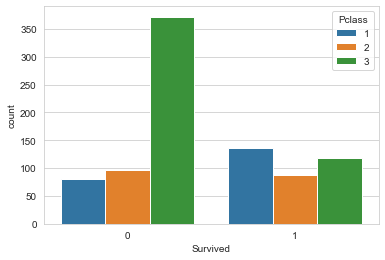

In [56]:
sns.countplot(x = 'Survived' , data = df_train , hue = 'Pclass')

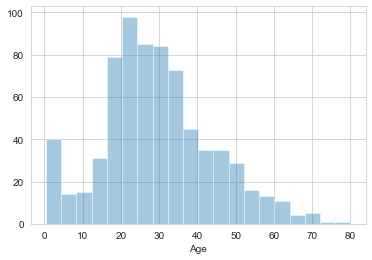

In [57]:
sns.distplot(df_train['Age'].dropna() , kde = False)

In [58]:
df_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


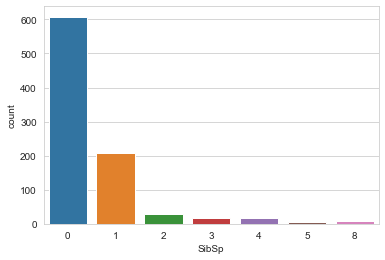

In [14]:
sns.countplot(x = 'SibSp' , data = df_train)

In [15]:
sns.countplot(x = 'Survived' , hue =  data = df_train)

SyntaxError: invalid syntax (<ipython-input-15-7fe279958307>, line 1)

In [ ]:
df_train['Fare'].hist(bins = 40 , figsize = (10,4))

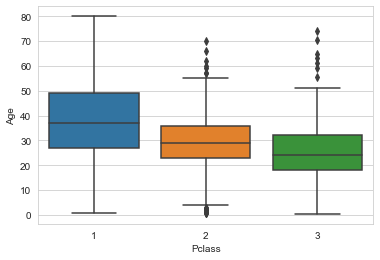

In [20]:
sns.boxplot(x = 'Pclass' , y = 'Age' , data = df_train)

In [126]:
def agecal(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2 :
            return 29
        else:
            return 24
    else:
        return Age

In [127]:
df_train['Age'] = df_train[['Age','Pclass']].apply(agecal,axis = 1)

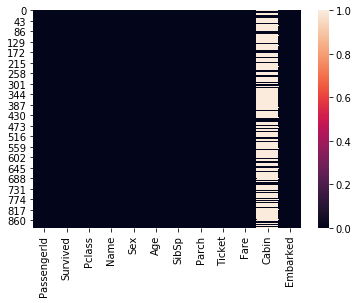

In [52]:
sns.heatmap(df_train.isnull())

In [129]:
df_train['Has_cabin']=df_train.Cabin.apply(lambda x:0 if type(x)==float else 1)

In [130]:
df_train['Title']=df_train.Name.apply(lambda x:re.search('([A-Z][a-z]+)\.',x).group(1))

In [ ]:
df_train.groupby(['Title']).count()[['PassengerId']]

In [77]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [132]:
df_train.loc[df_train.Title.isin(['Mlle','Mme','Ms']),'Title']='Miss'
df_train.loc[df_train.Title.isin(['Don','Rev','Capt','Col','Don','Dr','Sir','Major','Lady','Jonkheer','Countess']),'Title']='Special'

In [133]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special'], dtype=object)

In [134]:
df_final = pd.get_dummies(df_train, columns = ['Embarked','Sex','Title'] , drop_first = True)

In [135]:
df_final.drop(['Cabin','Ticket','Name'],axis = 1 , inplace = True)

In [136]:
x = df_final.drop(['Survived','PassengerId'] , axis = 1)
y = df_final['Survived']

In [139]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Has_cabin,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,22.0,1,0,7.2500,0,0,1,1,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0
4,3,35.0,0,0,8.0500,0,0,1,1,0,1,0,0


# Logistic Regression

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.3 , random_state = 101) 

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lg = LogisticRegression()

In [105]:
from scipy.stats import uniform
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [106]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(lg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [107]:
model = clf.fit(x_train , y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [108]:
predictions = model.predict(x_test)

In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [138]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[136  18]
 [ 32  82]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       154
           1       0.82      0.72      0.77       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



In [114]:
predict_final = model.predict(test_final.drop('PassengerId',axis = 1))

# Test data pre processing

In [71]:
test = pd.read_csv('C:\\Users\\surya.teja\\Downloads\\original\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_test.csv')

In [72]:
test['Age'] = test[['Age','Pclass']].apply(agecal,axis = 1)

In [75]:
test_final['Fare']=test_final.Fare.fillna(test_final.Fare.mean())

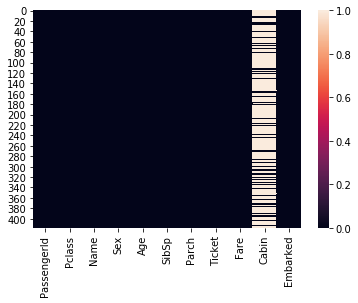

In [76]:
sns.heatmap(test.isnull())

In [77]:
test_final['Has_cabin']=test_final.Cabin.apply(lambda x:0 if type(x)==float else 1)

In [78]:
test_final['Title']=test_final.Name.apply(lambda x:re.search('([A-Z][a-z]+)\.',x).group(1))

In [80]:
test_final.loc[test_final.Title.isin(['Mlle','Mme','Ms']),'Title']='Miss'
test_final.loc[test_final.Title.isin(['Don','Rev','Capt','Col','Don','Dr','Sir','Major','Lady','Jonkheer','Countess','Dona']),'Title']='Special'

In [81]:
test_final.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special'], dtype=object)

In [ ]:
test_final = pd.get_dummies(test, columns = ['Embarked','Sex','Title'] , drop_first = True)

In [86]:
test_final.drop(['Name','Title','Cabin','Ticket'] , axis = 1 , inplace = True)

In [115]:
submission = pd.DataFrame({'PassengerId': test_final['PassengerId'],'Survived':predict_final})
pd.DataFrame(submission).to_csv('C:\\Users\\surya.teja\\Downloads\\submission_titanic.csv',index = False , header = True)

# Random Forest

In [140]:
from sklearn import metrics
import numpy as np

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.3 , random_state = 101) 

In [145]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return(mae)

In [146]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 100  		 Mean Absolute Error:  0
Max leaf nodes: 300  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 700  		 Mean Absolute Error:  0
Max leaf nodes: 800  		 Mean Absolute Error:  0
Max leaf nodes: 850  		 Mean Absolute Error:  0


In [162]:
rf = RandomForestClassifier(n_estimators=500)

In [163]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
red_rf = rf.predict(x_test)

In [165]:
confusion_matrix(y_test, red_rf)

array([[134,  20],
       [ 32,  82]], dtype=int64)

In [166]:
print(classification_report(y_test, red_rf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       154
           1       0.80      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [167]:
predict_rf = rf.predict(test.drop(['PassengerId','Q','S'],axis = 1))

In [168]:
submission_rf = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived':predict_rf})
pd.DataFrame(submission_rf).to_csv('C:\\Users\\surya.teja\\Downloads\\submission.csv',index = False , header = True)